In [1]:
# OBS!  nytt content i denna "del2", jämfört med "del1", är markerat i början av varje kod- eller markdowncell med "Del2 (new)".

# Nytt content är inom kapitel 1, 1.1, 1.2, 1.3. Resten av notebooken skrevs i del1.

# Health Study Python INL1 - Martin Westberg

In [2]:
# För att få relative path utifrån notebookens workspace mapp.
import sys, os 
sys.path.append(os.path.abspath("."))

# Läs in datan och visa upp sista 2 raderna (data health check)
import pandas as pd
df = pd.read_csv("./data/health_study_dataset.csv")
df.tail(2)
# df.info() # inga NaN. Length är 800 rader.

,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
798,799,50,F,172.6,55.3,155.0,3.58,No,0
799,800,50,M,189.2,79.4,139.7,5.62,No,0


## 1. Beskrivande analys

Vi ska räkna ut medel, median, min & max för: age, weight, height, systolic_bp, cholestrol.

Det blir lättast visualiserat med en Pandas DataFrame:

In [3]:
# Del2 (new)
# Läs in modul src (skapade en tom __init__.py däri så blir src ett paket) 
# Moved summary into src.summary
from src.summary import summary
summary(df)

,Age,Weight,Height,Blood Pressure,Cholesterol
Mean,49.4,73.4,171.8,149.2,4.9
Median,50.0,73.2,171.4,149.4,5.0
Min,18.0,33.7,144.4,106.8,2.5
Max,90.0,114.4,200.4,185.9,7.9


---

(old del1)

Vi ska skapa 3 olika grafer.

Det blir ett histogram av blodtrycksvärden, för att se hur många som hamnar i inkrementerade intervall.

Det blir även en boxplot som ska visa hur män och kvinnor väger, då medelvärden, medianer, kvadranter och outliers presenteras.

Det blir slutligen en bar graf av hur många som röker, vilket ger en enkel kategorisk jämförelse.

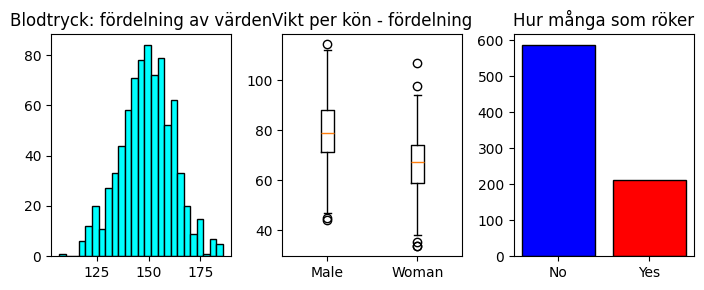

In [4]:
# Del2 (new)
# Moved plotting code into src package, and made this figure smaller.
from src.plotter import make_plots 
fig, ax = make_plots(df) 

Kommentar (old, del1):
- Till vänster ser vi ett till synes normalt fördelat histogram, där väldigt få har lägre än 120 och få har högre än 180, och flest har runt 150 i blodtryck.
- I mitten ser vi att män brukar väga mer än kvinnor, och det finns outliers. Orange linjer visar medianerna, som är nära mitten (medelvärdena) av lådorna. Whiskers visar hur långt bort från 25:e och 75:e kvartilen värden kan vara utan att anses outliers.
- Till höger ser vi att ca en proportion av 3:1 avstår från att röka.

* **(new del2):** Simpel klass "Analysis_class".

En enkel klass med grafer och beräkningar, objektorienterad programmering som **återupprepar summary DataFrame och 3 subplots ovan**.

Ett programmerat objekt som skapas, och definierade metoder kallas vilket blir lagrade attribut som även visas som output.

Att ha fördelat längre stycken python kod över flera .py filer och funktioner samt klasser i src som paket gör arbete i projektet mera modulärt, fördelaktigt för samarbete och notebookens presententation.

,Age,Weight,Height,Blood Pressure,Cholesterol
Mean,49.4,73.4,171.8,149.2,4.9
Median,50.0,73.2,171.4,149.4,5.0
Min,18.0,33.7,144.4,106.8,2.5
Max,90.0,114.4,200.4,185.9,7.9


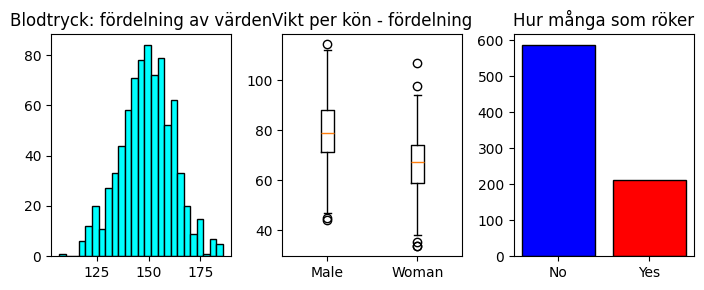

In [5]:
# Del2 (new) 
from src.analysis_class import Analysis_class 

instance_of_class = Analysis_class(df)

instance_of_class.assign_plots() 
instance_of_class.assign_summary() # avrundat till 1 decimal

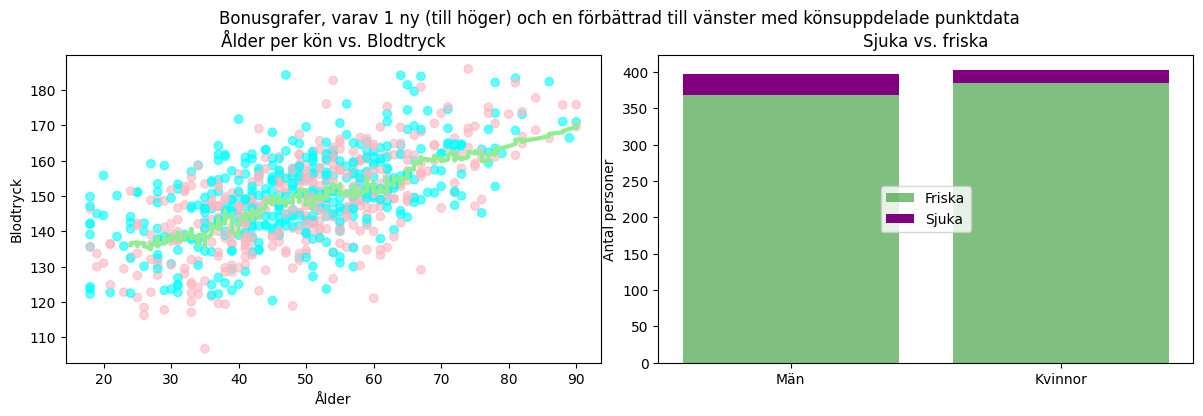

In [6]:
# Del2 (new)
# Flyttat en bonusgraf från del1 samt en ny bonusgraf för del2 'sjuka vs friska (antal)' till modul och kallar nedan in i notebooken.

# importera paket och modul
import matplotlib.pyplot as plt
from src.bonus_plots import bonus_plot_bp_age, bonus_plot_sick_healthy

# Sätter 2 bonusgrafer sida vid sida
fig, ax = plt.subplots(1,2,figsize=(12,4))
fig.suptitle("Bonusgrafer, varav 1 ny (till höger) och en förbättrad till vänster med könsuppdelade punktdata")
fig.tight_layout()

# Kallar funktionerna från src paketet
bonus_plot_bp_age(df, ax[0])
bonus_plot_sick_healthy(df, ax[1])

* (del2 new) Kommentar (vänster figur):

Linjen för rullande medel är lite hackig, fast visar på en rätt rak trend, skulle kunna ersättas med en rak linje såsom erhållen av minsta kvadrater regression, på engelska känt som *Ordinary Least Squares (OLS)*.

Blodtrycket stiger som regel med ålder som visat i grafen, med datapunkter färgade efter kön vilket ger ytterligare en nyans.

* (del2 new) Kommentar (höger figur):

Strax under 400 män, och strax över 400 kvinnor deltog i studien, varav andelen sjuka män är visuellt större än andelen sjuka kvinnor.

## 1.1 Linjär algebra i praktiken (del2 new)

### 1.1.1 Linjär Regression

Här ska numpy eller scikit-learn användas för matris- eller vektoranalys.

Ett förslag var enkel eller multipel regression för att förutspå blodtryck från ålder och vikt.

Utförlig läsning om linjär algebra görs i: Anton, H., Rorres, C. (2014). *Elementary Linear Algebra: Applications Version*, 11th Edition, Wiley.

Python dokumentation om linjär regression återfinns i https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html, och *PCA* är dokumenterat i https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

Principal Component Analysis (*PCA*) är motsvarigheten av Anton & Rorres (2014, pp. 419-427) definierade *The Principal Axes Theorem (7.3.1)*. Där beskrivs att egenvektorer som är principella axlar i *PCA* hittas med ortogonal diagonalisering av symmetriska matriser. Typiskt är kovariansmatris applicerad, varvid egenvektorer visar huvudkomponenternas riktade håll.

Återkalla att $\widehat{\beta} = (X^TX)^{-1}X^Ty$ uttrycker regressionen som matrisoperationer, med transponering och inverser för att uppskatta $\beta$. Enkel regression: $\hat{y} \approx \beta_0 + \beta_1x_1$ har en intercept $\beta_0$ som visar y-axelns skärningspunkt och koefficienten $\beta_1$ uppger hur $\hat{y}$ förändras per enhet ökad $x_1$. Multipel regression kan ha $\beta_2x_2$ adderade, alltså inkorporera flera variabler på sättet att $x_2, x_3, ...$ bidrar med olika koefficienter till uppskattning av $\hat{y}$.

Vi börjar med att låta Scikit-learn utföra beräkningarna:

In [7]:
from sklearn.linear_model import LinearRegression

X = df[["age", "weight"]].values # vi ska förutspå värden via dessa variabler
y = df["systolic_bp"].values # ska förutspås

method = LinearRegression()
method.fit(X, y)

print(f"Skärningspunkt y-axel:         {method.intercept_.round(4)}")
print(f"Koefficienterna ålder & vikt: {method.coef_.round(4)}")

Skärningspunkt y-axel:         109.4991
Koefficienterna ålder & vikt: [0.5389 0.1777]


Utifrån erhållna värden ovan uppskattades linjära sambandet till: $blodtryck \approx 0.54 * ålder + 0.18 * vikt + 109.5$.

Slutsatsen att en noll-kilos och noll-årig bebis har ca 109 i blodtryck är inte aktuell, snarare är detta uppskattade matematiska samband det som beräknat har minst kvadratiska fel, som därför utefter denna metod anses vara bäst passande raka linje.

Det finns multipel regression, polynom- och curve-fitting via exempelvis interpolering och extrapolering av polynom, som kanske erbjuder bättre uppskattningar i ändamålet att förutspå blodtryck via vikt och ålder. Läsning om detta finns i Mathews, J., Fink, K. (2004). *Numerical Methods using MATLAB*, 4th Edition, Pearson.

För att jämföra metoder såsom paketerat i Scikit-learn med annan metod, går vi vidare med numpy för att se om Scikit ger oss jämförbara och rimliga resultat. Se https://numpy.org/doc/2.3/reference/generated/numpy.linalg.inv.html för invers av matriser med numpy.

In [8]:
import numpy as np

# bygga upp designmatris med samma df värden som vid scikit-approachen.
ones_col      = np.ones(len(df))
design_matrix = np.column_stack([ones_col, df.age.values, df.weight.values])
# och som förut:
y = df["systolic_bp"].values # ska förutspås

# Matrisoperation, där @ är matrismultiplikation.
beta_hat = np.linalg.inv(design_matrix.transpose() @ design_matrix) @ design_matrix.transpose() @ y
# ger y, koefficient för ålder och vikt, respektivt.
print(f"Skärningspunkt y-axel:         {beta_hat[0].round(4)}")
print(f"Koefficienterna ålder & vikt: {beta_hat[1:].round(4)}")

# Jämföra numpy och scikit:
ydiff           = round(method.intercept_ - beta_hat[0],4)
age_weight_diff = (method.coef_ - beta_hat[1:]).round(4) # fick error av round(), .round() funkar.
print(f"\nSkillnad mellan scikit och numpy tillvägagångssätt: {ydiff}, {age_weight_diff}")

Skärningspunkt y-axel:         109.4991
Koefficienterna ålder & vikt: [0.5389 0.1777]

Skillnad mellan scikit och numpy tillvägagångssätt: -0.0, [-0.  0.]


Jämförelse av metoderna ger -0.0, [-0, 0], påtalande av likvärdiga numeriska utfall och metodiker. Minustecknena vid differens utvärderingen på slutet tyder på avrundning.

Om resultaten skulle skilja sig vore det aktuellt att se hur matematisk teori och implementering är annorlunda från scikit-learn paketets linjära regression.

Kompletterar regressionen med lite mera kod, utan att gå in på jämförelse med numpy och scikit. Vad som är intressant bortom ovan (intercept och koefficienter) är förklarad varians, $R^2$, som säger hur väl modellen förutspår detta i procent. Därefter är ju förutspådda värden intressant, och även resterna.

In [9]:
r2_score = method.score(X,y) # vi använder scikit från innan.
np.round(r2_score,3)

np.float64(0.405)

Detta ger 40.5 procent, påvisandes att en stor del varians är oförklarad av den multipla regressionen vi gjorde (förutspå blodtryck med ålder och vikt).

Näst så 

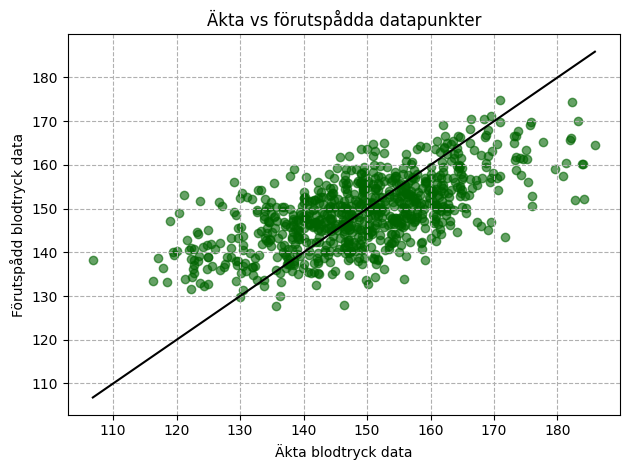

In [10]:
prediction_y = method.predict(X)

plt.figure()
plt.scatter(y, prediction_y, color="darkgreen", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="black", linestyle="-") # en 1:1 linje, om alla datapunkter vore på den skulle vi haft R^2=100%.
plt.xlabel("Äkta blodtryck data")
plt.ylabel("Förutspådd blodtryck data")
plt.title("Äkta vs förutspådda datapunkter")
plt.grid(True, linestyle="--")
plt.tight_layout()

Eftersom punkterna är spridda runtom linjen gör sig $R^2\approx 40\%$ visualiserad, påtalandes endast hyfsad koppling mellan äkta och förutsägning av blodtryck med denna multipla regression.

Det fortsätter med analys av rester:

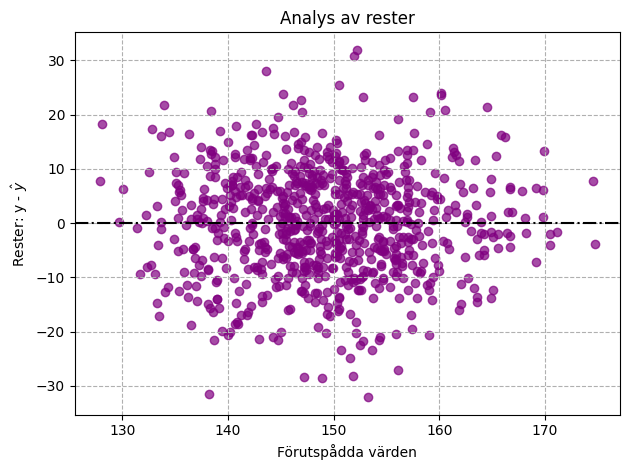

In [11]:
residual = y - prediction_y

plt.figure()
plt.scatter(prediction_y, residual, color="purple", alpha=0.7)
plt.axhline(0, color="black", linestyle="-.")
plt.title("Analys av rester")
plt.ylabel(r"Rester: y - $\hat{y}$")
plt.xlabel("Förutspådda värden")
plt.grid(True, linestyle="--")
plt.tight_layout()
plt.show()

Grafen ovan är ifrån jämförelse mellan förutspådda värden och riktiga värden. Med utspridda punkter har vi återigen såsom av $R^2\approx 40\%$ att en anseenlig del utav varians inte inkorporerats utav modellen, och specifik trend såsom klumpad data (kallat kluster) är inte heller närvarande. Från det senare tycks vi ändå inte ha någon systemisk partiskhet (bias).

---

### 1.1.2 Principal Component Analysis

Med regression färdigt spinner vi vidare på matrisanalys och egenvärden med ***PCA***, som inte huvudsakligen handlar om en variabels förutsägelse såsom regression, utan söker istället att förklara samband hos multipla datamatris variabler via att hitta huvudkomponenters riktning med högst variation. Kovariansmatrisers egenvektorer som i Anton & Rorres (2014) behåller variationen trots storleksförminskning, och egenvektorerna är framprojicerade från hälsodatans kovariansmatris.

Scikit-learn's funktion PCA förser vi med numeriska kolumner för att se hur variablerna (kolumnerna) i hälsodatan ger oss statistisk information. Ålder, längd, vikt, blodtryck och kolestrol, alltså.

In [12]:
from sklearn.decomposition import PCA

# Valda variabler (kolumner):
PCA_X = df[["age", "weight", "height", "systolic_bp", "cholesterol"]].values

method = PCA(n_components=3) # Vi tar tre största riktningarna (av fem kolumnernas varianser)
parts  = method.fit_transform(PCA_X) # enligt dokumentation i scikit: dimension reduktion, output 3 arrays (som sagt 3 största riktningarna)

# Vi sparar i varsina arrays, t.ex. för plotting senare.
parts_col1, parts_col2, parts_col3 = parts[:,0], parts[:,1], parts[:,2] # df["PC2"] TA BORT
display(parts_col1[-5:]) # kollar på sista 5 värdena i största riktningen.

array([28.02643089,  3.14483855,  2.34731443,  1.04129253, -3.42443233])

In [13]:
print(f"{method.explained_variance_.round(2)} är varianserna från huvudkomponenterna 1,2,3 och är i fallande störst ordning.\n")
print(f"Eigenvectors, engelskans egenvektorer följer..\n{method.components_.round(3)}\n")

[305.69 206.62  79.27] är varianserna från huvudkomponenterna 1,2,3 och är i fallande störst ordning.

Eigenvectors, engelskans egenvektorer följer..
[[ 0.748  0.172  0.066  0.637  0.025]
 [-0.269  0.895  0.353  0.038  0.005]
 [ 0.073 -0.342  0.932 -0.089 -0.016]]



Läst radvis så är översta raden huvudkomponent med störst varians, och den har ca 0.748 som vikt för ålder kolumn 1 i df (läs av elementet längst till vänster, med korrespons till första kolumnen i PCA_X), et cetera. Matematiskt: $part 1 = 0.748\cdot age + 0.172\cdot weight ...$

Men hur ser kovariansmatrisen ut, utan scikit paketet's snabbt hämtade lösning? Numpy har en .cov() funktion, dokumentation på https://numpy.org/devdocs//reference/generated/numpy.cov.html. Observationer är raderna, medan variablerna (kolumner) behöver $mean=0$ gör att vi tar radernas genomsnitt subtraherade från kolumnerna för att kolumnerna ska ha genomsnittena 0 (Anton & Rorres, 2014, pp. 419-427). Vidare blir kovariansmatrisen då ortogonalt diagonaliseringsbar varvid egenvektorerna också är ortogonala, ett tekniskt uttryck för oberoende riktningar, tack vare symmetri.

In [14]:
PCA_X_centered = PCA_X - PCA_X.mean(axis=0) # horisontella genomsnitten subtraherade.
 # PCA kräver att varje kolumn har medelvärde 0, annars speglar kovariansmatrisen inte variationerna korrekt.

covariance_matrix = np.cov(PCA_X_centered, rowvar=False) # rowvar False, True skulle varje rad felaktigt behandlas som variabel med observationer i kolumner.
pd.DataFrame(covariance_matrix) # en titt på kovariansmatrisen

,0,1,2,3,4
0,210.282414,-3.434960,-0.661570,112.716757,6.042866
1,-3.434960,187.280832,42.969872,31.420654,2.974796
2,-0.661570,42.969872,96.123504,10.824145,-0.360535
3,112.716757,31.420654,10.824145,163.670068,3.999077
4,6.042866,2.974796,-0.360535,3.999077,0.719804


Framåt använder vi numpy egenvektor funktion: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html.

In [15]:
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
eig_values, eig_vectors

(array([305.68846717, 206.62268713,   0.48170082,  66.01270252,
         79.27106441]),
 array([[-0.74788272,  0.26922018, -0.02767439,  0.60171984, -0.07320715],
        [-0.17191191, -0.8950924 , -0.01882708,  0.2275783 ,  0.34221273],
        [-0.06576379, -0.35337447,  0.012325  , -0.03650083, -0.93237192],
        [-0.63732176, -0.03781657, -0.00256758, -0.76448105,  0.08917971],
        [-0.02477548, -0.00514652,  0.99936038,  0.0194363 ,  0.01614769]]))

Scikit sköter sortering av ovan. Vi skippar det för att jämföra numpy och scikit. Här används https://numpy.org/doc/stable/reference/generated/numpy.dot.html.

In [16]:
PCA_scikit = np.column_stack([parts_col1, parts_col2, parts_col3])
PCA_numpy  = PCA_X_centered.dot(eig_vectors[:, :3]) # också 3 största riktningarna, via skalärprodukt numpy.dot()
PCA_numpy[:4]

array([[ 5.49651103e-01,  1.01763656e+01, -4.32599345e-01],
       [ 1.70815587e-01, -2.36384614e+01,  1.11004799e-02],
       [-1.01798642e+01, -4.70059936e+00,  7.69183114e-01],
       [-2.05393804e+01, -6.62202290e+00,  5.25332550e-01]])

Vi får negativa och positiva värden i output. Kan behövas beaktande för tecknen. Testar först ändå jämförelse med scipy och numpy PCA.

In [17]:
diff = (PCA_numpy[:15] - PCA_numpy[:15]).round(10) # första 15 raderna
print(diff)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Vi tycks få numeriskt kompitabla resultat vid jämförelse mellan de två tillvägagångssätten, vilket tyder på robusthet hos både numpy och scikit-learn inom PCA.

Låt oss göra en scatterplot för de två största huvudkomponenterna:

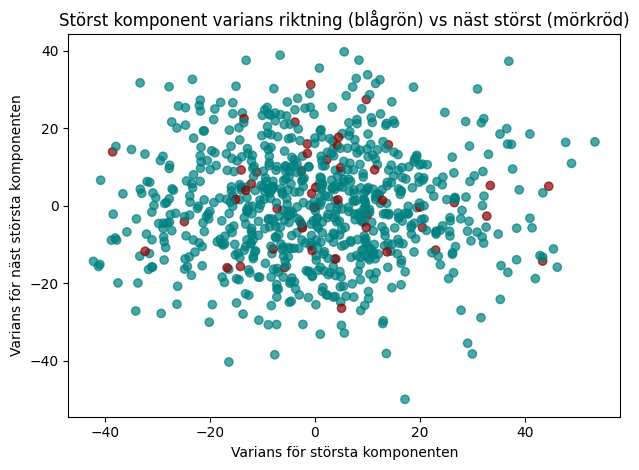

In [18]:
plt.figure()
colors = df["disease"].map({0:"teal", 1:"darkred"}) # ordnar färger
plt.scatter(parts_col1, parts_col2, c=colors, alpha=0.7)
plt.xlabel("Varians för största komponenten")
plt.ylabel("Varians för näst största komponenten")
plt.title("Störst komponent varians riktning (blågrön) vs näst störst (mörkröd)")
plt.tight_layout()
plt.show()

## 1.2 Utvecklad klass (del2 new)

I detta kapitlet skapar vi en mer utvecklad klass som inkorporerar linjär regression eller *PCA*. Absolut skulle denna notebooken i helhet kunna delas in i moduler och kallas, vilket skulle göra notebooken mer ren, istället för jag in delar av kod från 1.1.1 och 1.1.2 i en mer avancerad klass, och kallar i detta kapitel.

## 2. Relaterbar simulering

In [19]:
df.head(1) # en titt på df

,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0


In [20]:
is_sick = len(df[df['disease'] == 1]) # vi får att 47st har sjukdomen.
is_sick

47

In [21]:
is_healthy = len(df) - is_sick
is_healthy # vi får att 753 är friska.

sick_vs_healthy = is_sick / len(df)
sick_vs_healthy * 100 # vi får att 5.875% är sjuka.

5.875

In [22]:
# Simulera med numpy:
import numpy as np
np.random.seed(42)
n = 1000

# skapar 1000 nummer (0 eller 1) med sannolikhet 1-0.05875 och 0.05875, respektivt.
sim_pop = np.random.choice([0,1], size=n, p=[1-sick_vs_healthy,sick_vs_healthy]) 
print("Andel sjuka i simulerad befolkning: ",sim_pop.mean()) # vi får 0.056

# jämför simulering med actual:
print(f"Riktiga medelvärdet skiljer sig med: {round(sick_vs_healthy - float((sim_pop.mean())),6)} från simulerade medelvärdet.")
# vi får att den riktiga befolkningen har 0.28% mindre sjuka än den simulerade befolkningen.

Andel sjuka i simulerad befolkning:  0.056
Riktiga medelvärdet skiljer sig med: 0.00275 från simulerade medelvärdet.


## 3. Konfidensintervall

In [23]:
array_systolic = df['systolic_bp'].to_numpy()
array_systolic 

# Normalapproximation (z-score)
mean = array_systolic.mean() # ger 149.178625
sd = array_systolic.std(ddof=0) # använder inte ddof=1 då vi har hela population.
sd # ger ca 12.79 = standardavvikelse
n = len(array_systolic)
se = sd / np.sqrt(n) # ger ca 0.452 = standardfel (dvs osäkerhet i medelvärdet)
z = 1.96

ci_normal = (mean - z*se, mean + z*se)
np.round(ci_normal, 2) # ger ca (148.29, 150.07), 
# Om vi tar stickprov skulle 95% av intervaller som räknas ut med normalapproximation innehålla det äkta medelvärdet.

array([148.29, 150.06])

In [24]:
n = len(df) # 800 rader i df
np.random.seed(42) # reproducerbarhet (optional)

# Bootstrap
n_boot = 1000 # 1000 bootstrap resamples
boot_means = [] # lagra medelvärdena här
for i in range(n_boot): # loopa 1000 gånger
    sample = np.random.randint(0,n,n) # väljer 800st rader slumpvist med återläggning
    sample_vals = array_systolic[sample] # tar värden från slumpade rader
    boot_means.append(sample_vals.mean()) # beräkna och lagra medelvärde för varje bootstrap sample

ci_boot = (np.percentile(boot_means, [2.5, 97.5])) # 95% intervall där 2.5% ligger till höger och 2.5% till vänster.
display(ci_boot.round(2))
display(np.mean(boot_means).round(3))

array([148.31, 150.1 ])

np.float64(149.185)

In [25]:
# Jämför Normalapproximation och Bootstrap
print(f"Normalapproximerade CI - Bootstrap CI = ({round(ci_boot[0] - ci_normal[0], 3)}, {round(ci_boot[1] - ci_normal[1], 3)})")

Normalapproximerade CI - Bootstrap CI = (0.017, 0.034)


**Kommentar:**

Normalapproximation går under antagandet att blodtrycksvärdena är normalfördelade, vilket bootstrap inte behöver.

Resultaten för numeriska konfidensintervallen skiljde sig med några hundradelar (0.017, 0.034). Detta tyder på att blodtrycksvärdena i hälsodatan är normalfördelade.

**Källor:**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html

Wackerly, D., Mendenhall, W., Scheaffer, R. (2014). Mathematical Statistics with Applications, 7th Edition, Cengage Learning. (pp. 406-411; Ch 8.5, Confidence Intervals).

## 4. Hypotesprövning

Vi ska testa om hypotesen "rökare har högre medel-blodtryck än icke-rökare".

Med den instruktionen låter ett ensidigt hypotestest närmast, fast det kan läggas om som ett tvåsidigt hypotestest, som undersöker om medel-blodtryck skiljer sig negativt eller positivt mellan grupperna.

Det tvåsidiga testet är lite mera förutsättningslöst då det inte är en antagen riktning involverad.

En sak som påverkas via valet av tvåsidigt test är $alpha$, som delas in till vänster och höger svans på normalkurvan, samtidigt som ett ensidigt hypotestest med samma $alpha$ blir mera strikt.

Mera om detta finns att läsa i Wackerly et al. (2014). 

* Vi antar att nollhypotsen $H_0$ är att det inte är någon skillnad i medelvärdena på de två grupperna rökare och icke-rökare.
* Då är alternativa hypotesen $H_a$ eller $H_1$ att det är skillnad i medelvärdena. (Har lite LateX vana)

Bootstrap förutsätter inte normalt fördelad data, så den metoden är relevant och intressant för att se statistiska resultat.

In [26]:
# Bootstrap är mer robust, medan t-test (Welch) är något enklare.

smokers_bp = df.loc[df["smoker"]=="Yes", "systolic_bp"].to_numpy() # gör array med rökare och deras blodtryck
nonsmokers_bp = df.loc[df["smoker"]=="No", "systolic_bp"].to_numpy() # samma. Vi behöver inte .dropna() för detta dataset.

diff = smokers_bp.mean() - nonsmokers_bp.mean() # tror att rökare har högre snitt, så vi subtraherar icke-rökares genomsnitt från rökares.
print("Rökare har ",round(diff,3), " högre blodtryck än icke-rökare i snitt.") # 0.472 högre blodtryck har rökare i snitt.

print("Blodtryck standardavvikelse: ", round(smokers_bp.std(),3))

Rökare har  0.472  högre blodtryck än icke-rökare i snitt.
Blodtryck standardavvikelse:  13.237


In [27]:
# Bootstrap
np.random.seed(42)
n_boot = 1000
boot_diffs = []

n_smokers = len(smokers_bp) # 213
n_nonsmokers = len(nonsmokers_bp) # 587

for i in range(n_boot):
    smokers_sample = np.random.choice(smokers_bp, n_smokers, replace=True)
    nonsmok_sample = np.random.choice(nonsmokers_bp, n_nonsmokers, replace=True)
    boot_diffs.append(smokers_sample.mean() - nonsmok_sample.mean())

ci_boot = np.percentile(boot_diffs, [2.5, 97.5])
display(ci_boot.round(3))
round(np.mean(boot_diffs),3)

# Delade upp df i grupp rökare, icke-rökare
# Gjorde 1000 par av bootstrap stickprov
# Lagrade skillnaden i medel för stickproven

array([-1.479,  2.475])

np.float64(0.474)

Tog percentiler för 95% ci av skillnad i medelvärden, och intervallet (-1.48, 2.475) innehåller 0, så hälsodata visar inte statistiskt signifikant skillnad mellan gruppernas blodtryck.

Medelvärdet på bootstrap genomsnitts skillnaderna är dock väldigt nära df's uträknade motsvarande värde.

Vi fortsätter med Welch t-test, som förutsätter ungefärlig normalfördelning men tillåter olika varianser:

In [28]:
# t-test (Welch)
from scipy import stats
t_stat, p_val = stats.ttest_ind(smokers_bp, nonsmokers_bp, equal_var=False)
round(float(t_stat),3), round(float(p_val),3)

# t värdet på ca 0.45 säger hur medelvärdena skiljer sig.
# p värdet är högre än 0.05 så vi kan inte säga att skillnaden (t) är statistiskt signifikant.

(0.45, 0.653)

In [29]:
# redan läst in pandas scipy numpy.

# Kopierar några rader från bootstrap hypotestest
smokers_bp = df.loc[df["smoker"]=="Yes", "systolic_bp"].to_numpy() # gör array med rökare och deras blodtryck
nonsmokers_bp = df.loc[df["smoker"]=="No", "systolic_bp"].to_numpy() # samma. Vi behöver inte .dropna() för detta dataset.
diff = smokers_bp.mean() - nonsmokers_bp.mean() # skillnad i genomsnittligt blodtryck mellan rökare och icke-rökare.
n_smokers = len(smokers_bp) # 213
n_nonsmokers = len(nonsmokers_bp) # 587

# Sparar medelvärden och standardavvikelser
mean_bp_smokers = np.mean(smokers_bp)
mean_bp_nonsmokers = np.mean(nonsmokers_bp)
std_bp_smokers = np.std(smokers_bp, ddof=0)
std_bp_nonsmokers = np.std(nonsmokers_bp, ddof=0)

# Definiera funktion som simulerar power
def pwr_ttest_simulator(n_simulations, alpha=0.05):
    occurences = 0 # a counter
    for _ in range(n_simulations): # loop n times 
        sample_smokers = np.random.normal(mean_bp_smokers, std_bp_smokers, n_smokers)
        sample_nonsmokers = np.random.normal(mean_bp_nonsmokers, std_bp_nonsmokers, n_nonsmokers)
        # Genererar normalfördelade stickprov runt äkta medelvärden och standardavvikelser,
        # med samma storlek som antalet rökare och icke-rökare. 

        t_stat_sim, p_val_sim = stats.ttest_ind(sample_smokers, sample_nonsmokers, equal_var=False)
        # Scipy t-test (tillåter olika varianser mellan grupperna)
        if p_val_sim < alpha:
            occurences += 1

    return occurences / n_simulations

pwr_5000_samples = pwr_ttest_simulator(n_simulations=5000)
pwr_5000_samples # ger ca 0.0772

0.0772

**Kommentar:**

Simuleringen av power med 5000 iterationer gav power 0.076, så i 7.6% av upprepningar av t-testerna uppstår meningsfull differens fastän grupperna rökare och icke-rökare har riktig skillnad. 

Om differens uppstod oftare, det vill säga om power var högre, skulle riktig skillnad upptäckas enklare. 

Att misslyckas med upptäckt av riktig skillnad är känt som $type\ II\ error$.

Medan vi fick ett CI av bootstrap, fick vi t-värde = 0.45 och p = 0.653.

Värdet på t och tidigare observerad skillnad i medelvärden är rätt lika numeriskt, men olika i matematisk metodik.

P-värdet är långt högre än 0.05, så skillnader kan enkelt komma fram slumpmässigt, och vi avfärdar därmed inte nollhypotesen $H_0$.

Givet att vi hade stort antal stickprov, en standardavvikelse $sd_{smokerBP} = 13.237$  medan värdet $t=0.45$ påvisar låg magnitud, och beaktandes att låga skillnader lätt kan framkomma med slump via ett högt p-värde, anser jag att power är låg. 

Med låg power har vi att oddsen är låga att det är någon substansiell statistisk skillnad mellan rökares- och icke-rökares blodtryck.

**Källor:** 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html

Wackerly, D., Mendenhall, W., Scheaffer, R. (2014). Mathematical Statistics with Applications, 7th Edition, Cengage Learning. (pp. 406-411; Ch 8.5, Confidence Intervals)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

Wackerly, D., Mendenhall, W., Scheaffer, R. (2014). Mathematical Statistics with Applications, 7th Edition, Cengage Learning. (pp. 537-540; Ch 10.6, Another Way to Report the Results of a Statistical Test: Attained Significance Levels, or p-Values)

Wackerly, D., Mendenhall, W., Scheaffer, R. (2014). Mathematical Statistics with Applications, 7th Edition, Cengage Learning. (pp. 545-549; Ch 10.8, Small-sample hypothesis testing for $\mu$ and $\mu_1 - \mu_2$)

# 5. Utökad analys av Power


Nivån på Power önskas gärna vara kring 80%, för då upptäcks skillnad mellan grupper ofta nog.

Med 5000 simuleringar fick vi power på 7.72%, så hur stor sample size behövs för att nå 80%? 

Med python-paketet statsmodels kan vi undersöka detta med en funktion TTestIndPower:

In [30]:
from statsmodels.stats.power import TTestIndPower

# Cohen's d: vi standardiserar effekt genom att beräkna sammansatt standardavvikelse
bp_mean_diff = mean_bp_smokers - mean_bp_nonsmokers
bp_sd_pooled = np.sqrt((std_bp_nonsmokers**2 + std_bp_smokers**2) / 2)
cohens_d = bp_mean_diff / bp_sd_pooled

# Parametervärden
alpha = 0.05
desired_power = 0.8

# statsmodels funktionen + beräkning av behövd stickprovsstorlek för 80% power
solver = TTestIndPower()
n_per_group = solver.solve_power(effect_size=cohens_d, alpha=alpha, power=desired_power, alternative="two-sided")

print("Cohen's d = ", round(cohens_d,4))
print("För 80% power behövs n per grupp =",np.round(n_per_group,2))

Cohen's d =  0.0365
För 80% power behövs n per grupp = 11785.42


I och med att Cohen's d värdet är mycket lågt, blir statsmodels' uträknade n_per_group värde högt, på ca 12,000.

Jämfört med vårt dataset med 800 personer totalt är stickprovsstorlek närmare 12,000 personer orimligt om sådant test skulle utföras i verkligheten.

Låt oss visualisera hur stor sample size behövs för 80% power:

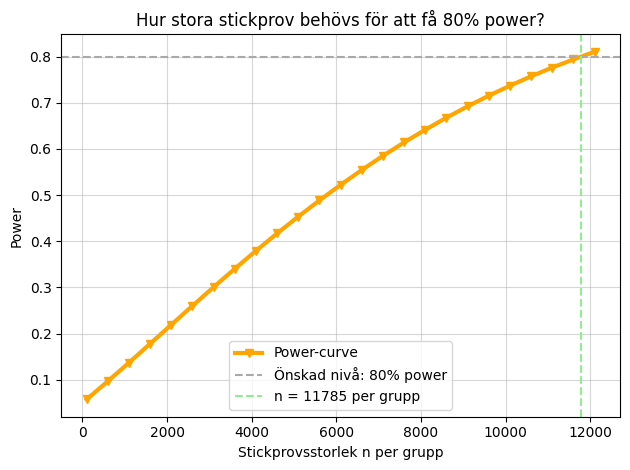

In [31]:
# (till skillnad från df dataset sample sizes som har 800 människor totalt)
n_grid = np.arange(100, 12500, 500)  # Låt x-axeln visa minst 100 till 12500 personer n_per_group, steglängd 500.
power_values = solver.power(effect_size=cohens_d, nobs1=n_grid, alpha=alpha, alternative='two-sided')
# Vi testar två-sidig skillnad mot nollhypotesen, alltså om rökare har lägre eller högre blodtryck.

fig, ax = plt.subplots()
# Plot av power-kurva, horizontal och vertical line vid önskad power och resultat för n_per_group, respektivt.
ax.plot(n_grid, power_values, color="orange", linewidth="3", marker="v", label="Power-curve")
ax.axhline(desired_power, color='darkgray', linestyle='--', label="Önskad nivå: 80% power")
ax.axvline(n_per_group, color='lightgreen', linestyle='--', label=f"n = {int(n_per_group)} per grupp")

ax.set_title("Hur stora stickprov behövs för att få 80% power?")
ax.set_xlabel("Stickprovsstorlek n per grupp")
ax.set_ylabel("Power")
plt.grid(True, alpha=0.5)
plt.legend(loc="lower center")
plt.tight_layout()

Det framstår av grafen att gällande studerade grupper med små skillnader så är mycket stora stickprovsstorlekar nödvändiga för att frekvent kunna upptäcka små skillnader mellan grupperna.

Problematiken är just detta med $type\ II\ errors$, att små samples inte räcker till för att upptäcka små skillnader.

Med bootstrap och Welch t-test uppgavs endast en liten skillnad mellan rökares och icke-rökares blodtryck á 0.45 till 0.47. Med det i åtanke är det inte särskilt problematiskt att ha observerat en låg power-nivå med så liten stickprovsstorlek som hälsodatan tillhandahöll, och att utvärdera en sådan liten skillnad via mycket stora stickprovsstorlekar är också överflödigt.

**Sammantaget** så förkastar jag *inte* nollhypotesen $H_0$. I och med liten observerad skillnad med låg upptäcktsgrad samt relativt små stickprovsstorlekar jämfört med storlekar som behövs för hög power nivå, är inte meningsfull skillnad statistiskt påvisad.

**Källor:**

https://www.statsmodels.org/stable/_modules/statsmodels/stats/power.html#TTestIndPower

Wackerly, D., Mendenhall, W., Scheaffer, R. (2014). Mathematical Statistics with Applications, 7th Edition, Cengage Learning. (pp. 545-549; Ch 10.8, Small-sample hypothesis testing for $\mu$ and $\mu_1 - \mu_2$)